In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import polyfit, polyval
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator


## Sensitivity variations

### Elevation: Mantaining slope 46.5 and slope aspect 176.1 of South 1
-3000: My Mac \
2619: Cluster (25300577 (1001-6000), 25301091 (6001-11001), 25301231 (11001-16001), 25301269 (16001-21001)) South 1


##### Elevation -3000m
##### Slope 46.5
##### Slope Aspect 176.1

In [57]:
elev_3000= '../Bramson_et_al_2024_JGR-Planets_Data/v12/Scarps/South1/Test1/Output/Params1_Tinit250/2025-06-19_1201_output.txt'

df3000 = pd.read_csv(elev_3000, sep=r'\s+')
df3000

LaskarTimestep  time_years       ecc        obl         Lsp  \
0                1001   -20000000  0.026171  33.922282  -98.499636   
1                1002   -19999000  0.025083  34.222312  -92.513371   
2                1003   -19998000  0.024047  34.535462  -86.325954   
3                1004   -19997000  0.023018  34.862300  -79.717246   
4                1005   -19996000  0.021917  35.201604  -72.787666   
...               ...         ...       ...        ...         ...   
19996           20997       -4000  0.089582  24.736458 -135.201046   
19997           20998       -3000  0.090497  24.843271 -128.653555   
19998           20999       -2000  0.091571  24.954663 -121.964549   
19999           21000       -1000  0.092414  25.070010 -115.454439   
20000           21001           0  0.093315  25.189417 -108.955069   

            Tsurf      SF12  ForcedConv  FreeConv  TotalSubl  
0      173.007740  0.558088    0.110539  0.090274   0.200814  
1      173.463843  0.573666    0.122525  0.102115   0.224640  
2      173.926278  0.589948    0.134942  0.114486   0.249428  
3      174.388531  0.606940    0.146856  0.126422   0.273278  
4      174.875900  0.624550    0.159287  0.138947   0.298234  
...           ...       ...         ...       ...        ...  
19996  158.131588  0.178417    0.000333  0.000000   0.000333  
19997  158.235545  0.181086    0.000399  0.000000   0.000399  
19998  158.357239  0.183911    0.000483  0.000000   0.000483  
19999  158.488827  0.186884    0.000575  0.000000   0.000575  
20000  158.622276  0.190011    0.000684  0.000000   0.000684  

[20001 rows x 10 columns]

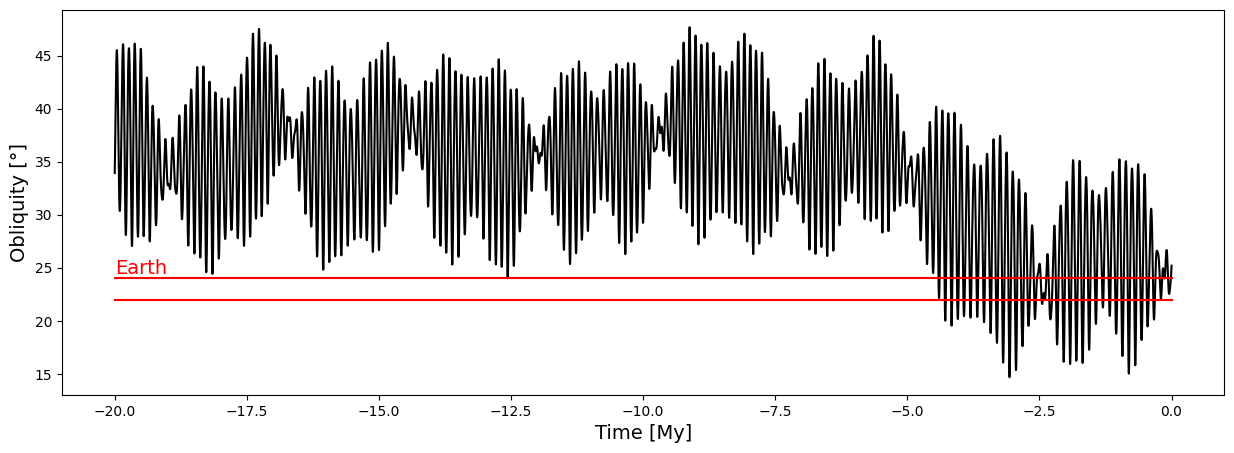

In [58]:
years3000= np.array(df3000['time_years'].tolist())
obl3000=np.array(df3000['obl'].tolist())
Subl3000=np.array(df3000['TotalSubl'].tolist())
temp3000=np.array(df3000['Tsurf'].tolist())
ecc3000=np.array(df3000['ecc'].tolist())
Lsp3000=np.array(df3000['Lsp'].tolist())



plt.figure(figsize=(15, 5))
plt.plot(years3000/1000000,obl3000, color='black')
plt.plot(np.linspace(-20,0,100),np.full_like(np.linspace(-20,0,100),22),color='red')
plt.plot(np.linspace(-20,0,100),np.full_like(np.linspace(-20,0,100),24),color='red')
plt.text(-19, 24.1, 'Earth', fontsize=14, ha='right', va='bottom', color='red')


plt.xlabel('Time [My]',fontsize=14)
plt.ylabel('Obliquity [°]',fontsize=14)
plt.savefig('Obliquity')

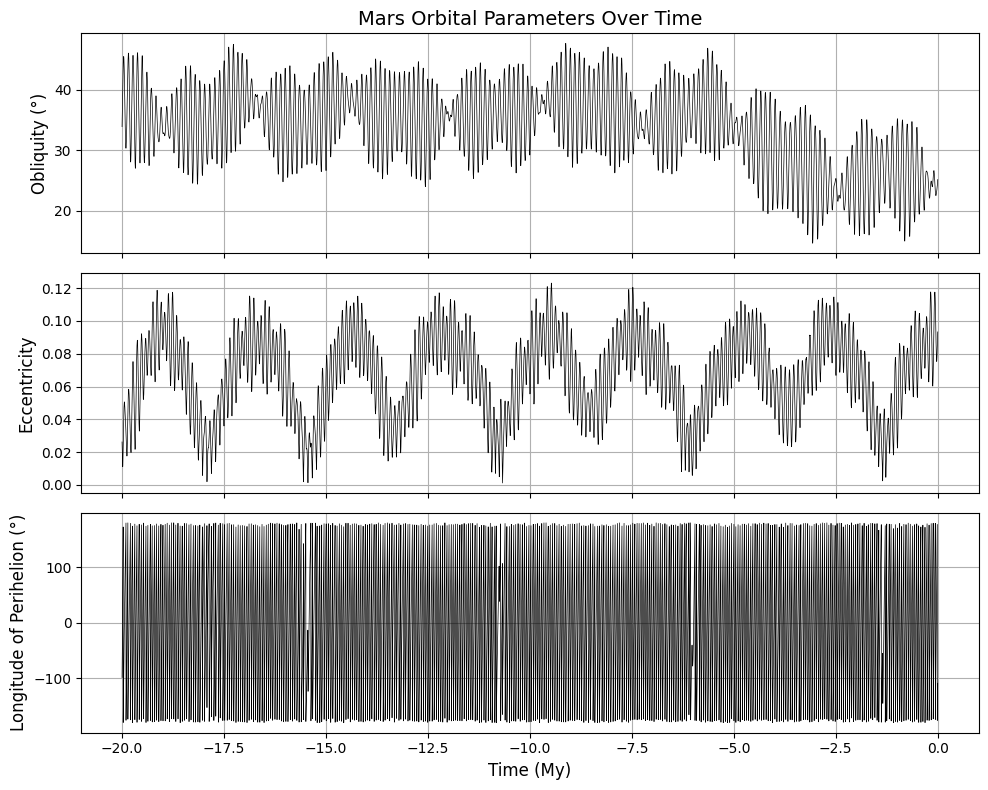

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Obliquity
axes[0].plot(years3000/1000000, obl3000, color='black',linewidth=0.5)
axes[0].set_ylabel("Obliquity (°)", fontsize=12)
axes[0].set_title("Mars Orbital Parameters Over Time", fontsize=14)

# Eccentricity
axes[1].plot(years3000/1000000, ecc3000, color='black',linewidth=0.5)
axes[1].set_ylabel("Eccentricity", fontsize=12)

# Longitude of perihelion
axes[2].plot(years3000/1000000, Lsp3000, color='black',linewidth=0.5)
axes[2].set_ylabel("Longitude of Perihelion (°)", fontsize=12)
axes[2].set_xlabel("Time (My)", fontsize=12)

# Format
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('OrbitalForcing')
plt.show()

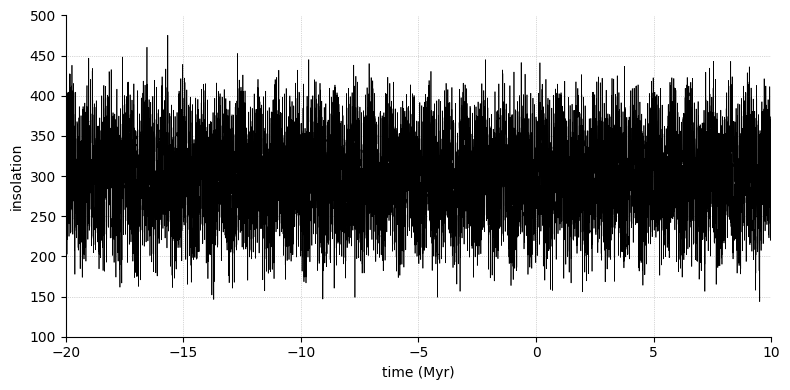

In [125]:
# === Synthetic time and insolation data ===
time_myr = np.linspace(-20, 10, 20000)  # High resolution
np.random.seed(42)
# Simulated insolation: trend + noise + periodic variation
insolation = (
    300
    + 50 * np.sin(2 * np.pi * time_myr / 0.08)  # high-frequency signal
    + 20 * np.sin(2 * np.pi * time_myr / 0.8)   # lower-frequency signal
    + 30 * np.random.randn(len(time_myr))      # noise
)

plt.show()

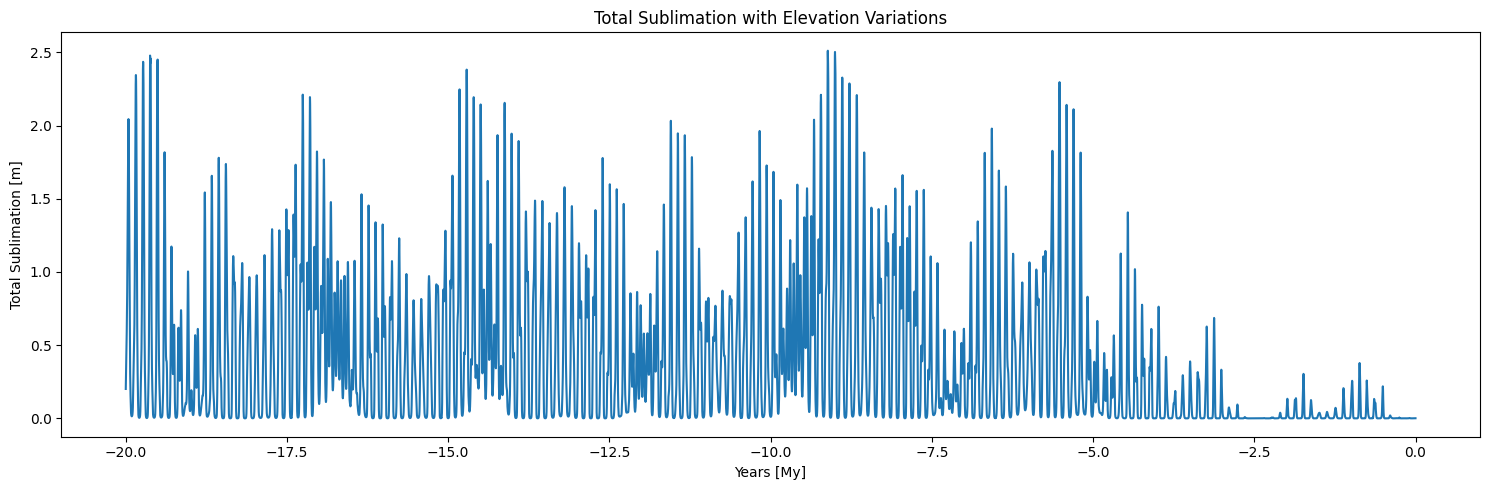

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(years3000/1000000, Subl3000)  #should I multiply by 1000 


plt.xlabel('Years [My]')
plt.ylabel('Total Sublimation [m]')
plt.title('Total Sublimation with Elevation Variations')


plt.tight_layout()
plt.show()

In [61]:
#total accumulative sublimation in steps of 1000years. After 1000y value *1000, then 2000y subl_past+subl_pres *1000. 
cumulative3000=[]
val=0
for i in Subl3000:
    val+= i*1000
    cumulative3000.append(val)


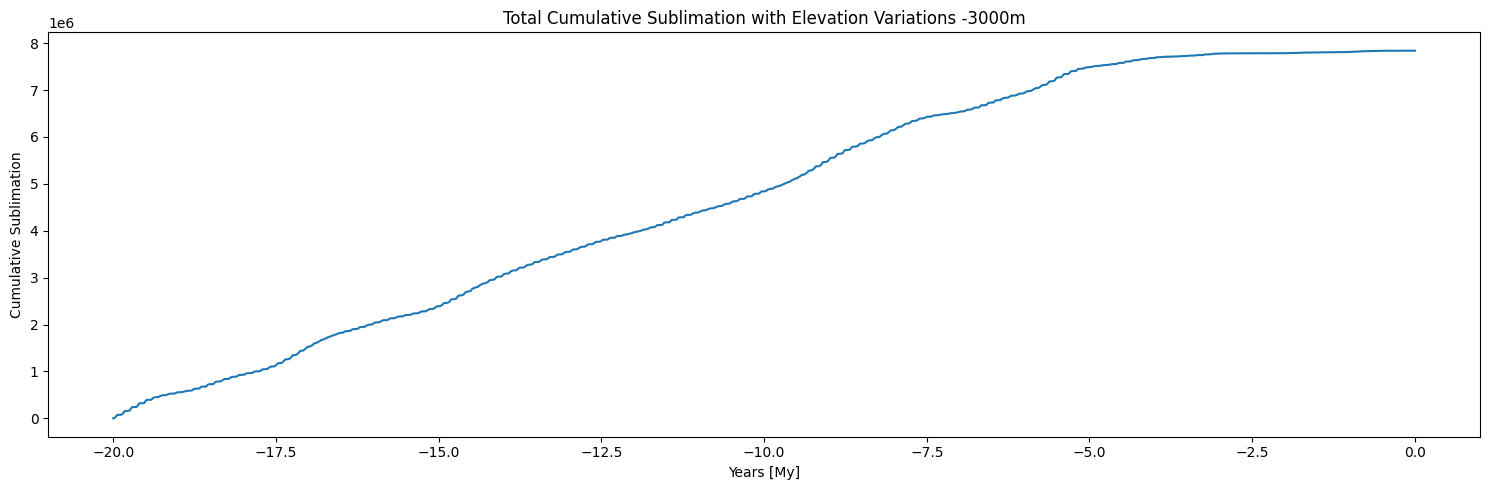

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(years3000/1000000, cumulative3000)  


plt.xlabel('Years [My]')
plt.ylabel('Cumulative Sublimation')
plt.title('Total Cumulative Sublimation with Elevation Variations -3000m')


plt.tight_layout()
plt.show()

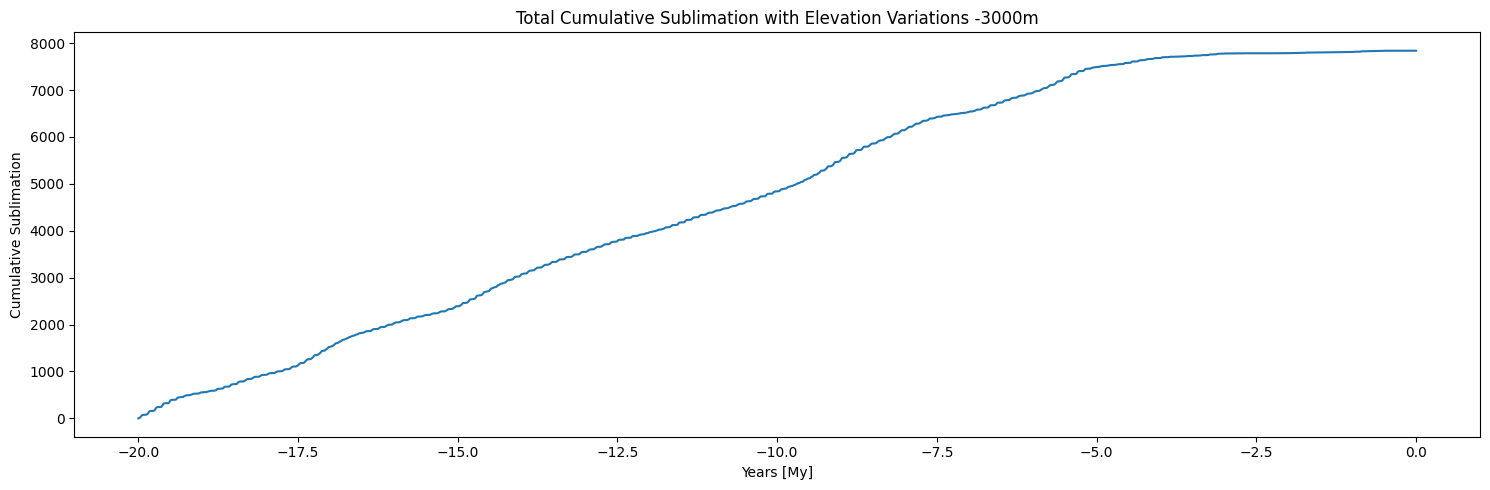

In [63]:
plt.figure(figsize=(15, 5))
plt.plot(years3000/1000000, np.array(cumulative3000)/1000)  


plt.xlabel('Years [My]')
plt.ylabel('Cumulative Sublimation')
plt.title('Total Cumulative Sublimation with Elevation Variations -3000m')


plt.tight_layout()
plt.show()

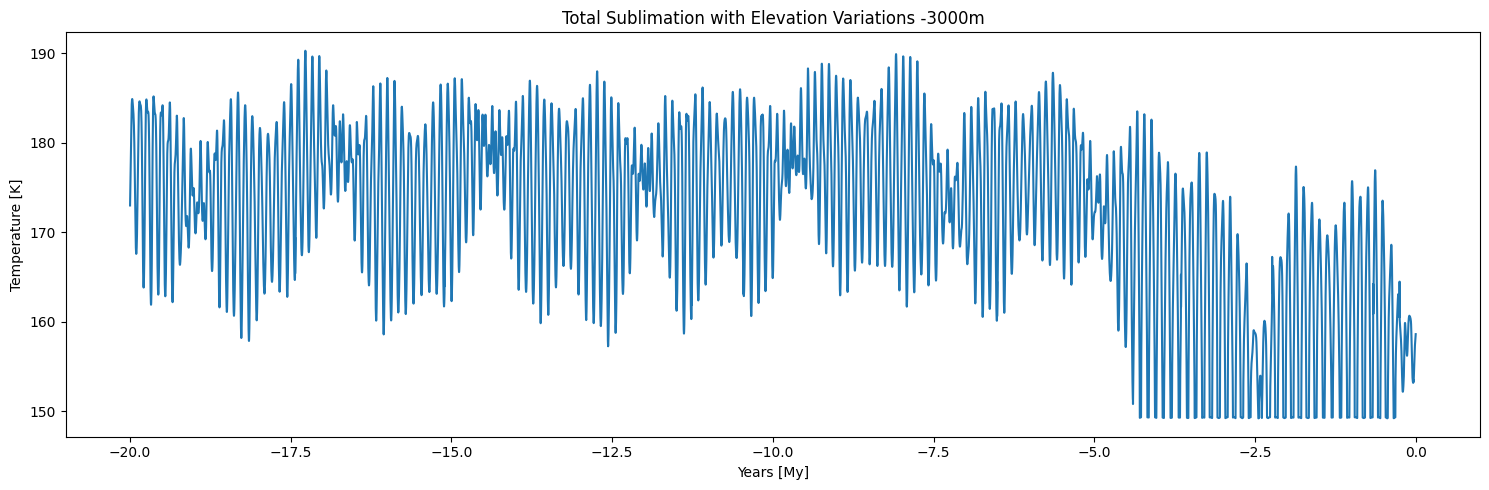

In [64]:
plt.figure(figsize=(15, 5))
plt.plot(years3000/1000000, temp3000)  


plt.xlabel('Years [My]')
plt.ylabel('Temperature [K]')
plt.title('Total Sublimation with Elevation Variations -3000m')

plt.tight_layout()
plt.show()

##### Elevation 2619m
##### Slope 46.5
##### Slope Aspect 176.1

In [65]:
elev2600_1='SensitivityVariations/Elevation/It1.1/Output/2025-07-09/2025-07-09_1412_output.txt'
elev2600_2='SensitivityVariations/Elevation/It1.2/Output/2025-07-09/2025-07-09_1413_output.txt'
elev2600_3='SensitivityVariations/Elevation/It1.3/Output/2025-07-09/2025-07-09_1424_output.txt'
elev2600_4='SensitivityVariations/Elevation/It1.4/Output/2025-07-09/2025-07-09_1423_output.txt'
elev2600_5='../Bramson_et_al_2024_JGR-Planets_Data/v12/Scarps/South1/Test1/Output/2025-07-21/2025-07-21_1257_output.txt'

df2600_1 = pd.read_csv(elev2600_1, sep=r'\s+')
df2600_2 = pd.read_csv(elev2600_2, sep=r'\s+')
df2600_3 = pd.read_csv(elev2600_3, sep=r'\s+')
df2600_4 = pd.read_csv(elev2600_4, sep=r'\s+')
df2600_5 = pd.read_csv(elev2600_5, sep=r'\s+')

df2600_5

LaskarTimestep  time_years       ecc        obl         Lsp       Tsurf  \
0             20104     -897000  0.044772  27.084403   47.975500  163.121293   
1             20105     -896000  0.043734  27.485662   56.707094  163.846611   
2             20106     -895000  0.042814  27.881665   65.683495  164.553317   
3             20107     -894000  0.042044  28.272600   74.803967  165.225018   
4             20108     -893000  0.041382  28.658881   83.897096  165.877361   
..              ...         ...       ...        ...         ...         ...   
893           20997       -4000  0.089582  24.736458 -135.201046  158.785009   
894           20998       -3000  0.090497  24.843271 -128.653555  158.828534   
895           20999       -2000  0.091571  24.954663 -121.964549  158.893969   
896           21000       -1000  0.092414  25.070010 -115.454439  158.968915   
897           21001           0  0.093315  25.189417 -108.955069  159.049962   

         SF12  ForcedConv      FreeConv  TotalSubl  
0    0.247272    0.002111  1.467990e-04   0.002258  
1    0.261455    0.002548  2.383620e-04   0.002786  
2    0.276250    0.003075  3.627970e-04   0.003438  
3    0.291593    0.003702  5.239170e-04   0.004226  
4    0.307247    0.004481  7.398930e-04   0.005221  
..        ...         ...           ...        ...  
893  0.178417    0.001135  0.000000e+00   0.001135  
894  0.181086    0.001301  0.000000e+00   0.001301  
895  0.183911    0.001499  0.000000e+00   0.001499  
896  0.186884    0.001709  1.370000e-07   0.001709  
897  0.190011    0.001945  7.152000e-06   0.001953  

[898 rows x 10 columns]

In [66]:
years2600_1= (df2600_1['time_years'].tolist())
years2600_2= (df2600_2['time_years'].tolist())[1:]
years2600_3= (df2600_3['time_years'].tolist())[1:]
years2600_4= (df2600_4['time_years'].tolist())[1:]
years2600_5= (df2600_5['time_years'].tolist())[1:]
obl2600_1=(df2600_1['obl'].tolist())
obl2600_2=(df2600_2['obl'].tolist())[1:]
obl2600_3=(df2600_3['obl'].tolist())[1:]
obl2600_4=(df2600_4['obl'].tolist())[1:]
obl2600_5=(df2600_5['obl'].tolist())[1:]
Subl2600_1=(df2600_1['TotalSubl'].tolist())
Subl2600_2=(df2600_2['TotalSubl'].tolist())[1:]
Subl2600_3=(df2600_3['TotalSubl'].tolist())[1:]
Subl2600_4=(df2600_4['TotalSubl'].tolist())[1:]
Subl2600_5=(df2600_5['TotalSubl'].tolist())[1:]
temp2600_1=(df2600_1['Tsurf'].tolist())
temp2600_2=(df2600_2['Tsurf'].tolist())[1:]
temp2600_3=(df2600_3['Tsurf'].tolist())[1:]
temp2600_4=(df2600_4['Tsurf'].tolist())[1:]
temp2600_5=(df2600_5['Tsurf'].tolist())[1:]

In [67]:
years2600=np.array(years2600_1+years2600_2+years2600_3+years2600_4+years2600_5)
obl2600=np.array(obl2600_1+obl2600_2+obl2600_3+obl2600_4+obl2600_5)
Subl2600=np.array(Subl2600_1+Subl2600_2+Subl2600_3+Subl2600_4+Subl2600_5)
temp2600=np.array(temp2600_1+temp2600_2+temp2600_3+temp2600_4+temp2600_5)

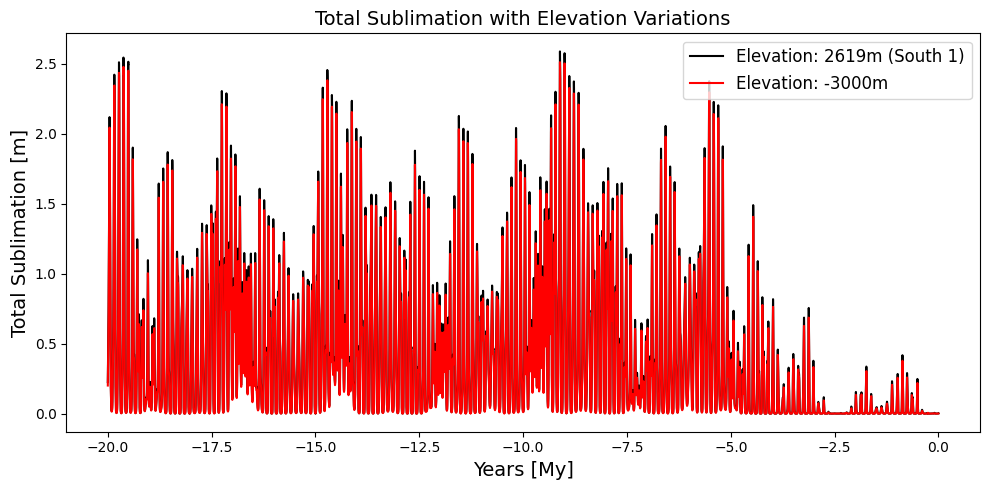

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(years2600/1000000, Subl2600,color='black',label='Elevation: 2619m (South 1)')  #should I multiply by 1000 
plt.plot(years3000/1000000,Subl3000,color='red',label='Elevation: -3000m')

plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Total Sublimation [m]',fontsize=14)
plt.title('Total Sublimation with Elevation Variations',fontsize=14)


plt.tight_layout()
plt.legend(fontsize=12)
plt.savefig('ElevationNew')
plt.show()

In [69]:
#total accumulative sublimation in steps of 1000years. After 1000y value *1000, then 2000y subl_past+subl_pres *1000. 
cumulative2600=[]
val=0
for i in Subl2600:
    val+= i*1000
    cumulative2600.append(val)


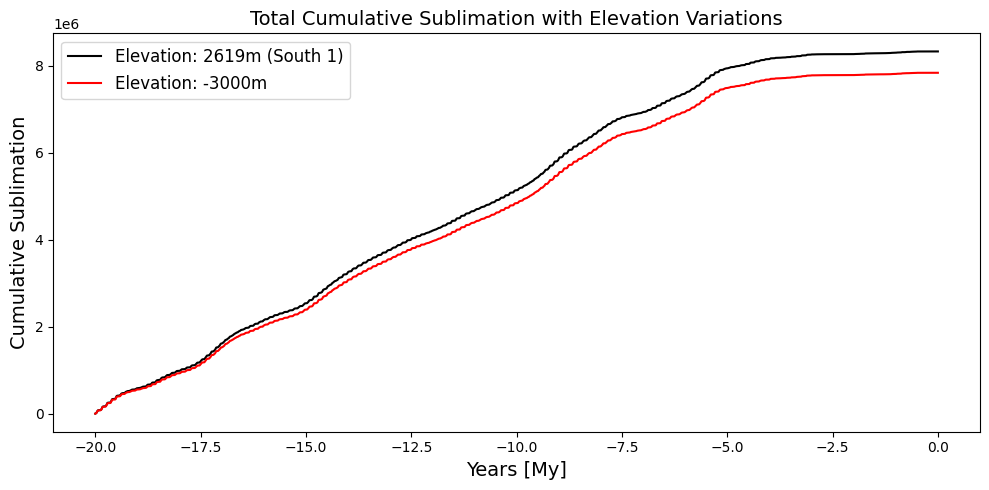

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(years2600/1000000, cumulative2600,color='black',label='Elevation: 2619m (South 1)')  
plt.plot(years3000/1000000,cumulative3000,color='red', label = 'Elevation: -3000m ')

plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation',fontsize=14)
plt.title('Total Cumulative Sublimation with Elevation Variations',fontsize=14)

plt.legend(fontsize=12)

plt.savefig('SensitivityElevation')
plt.tight_layout()
plt.show()


In [77]:
# Locally Weighted Regression
lowess = sm.nonparametric.lowess
smoothed2_2600 = lowess(cumulative2600, years2600, frac=0.04)  


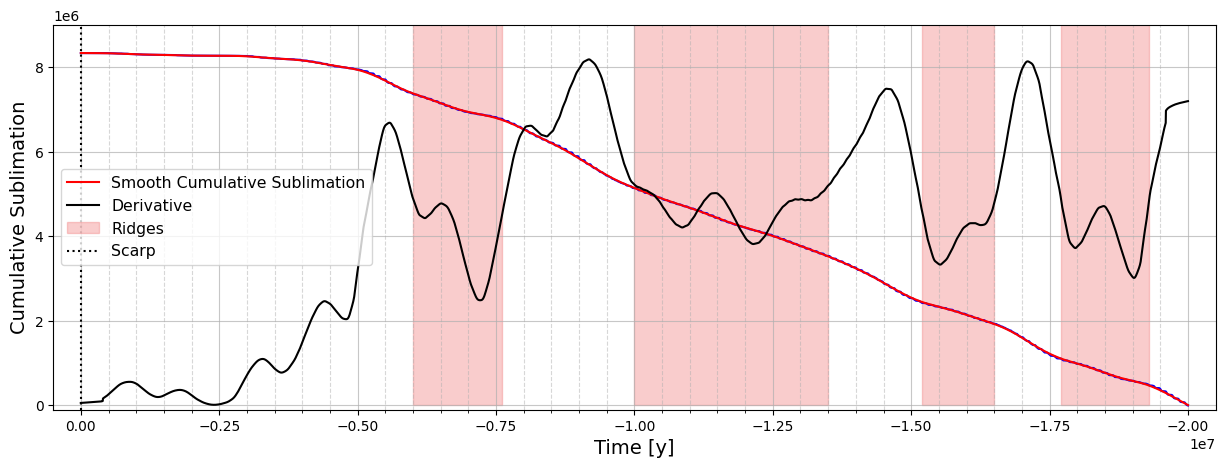

In [78]:
deriv=np.gradient(smoothed2_2600[:,1])
fig=plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(years2600,cumulative2600,color='blue')
ax.plot(years2600,smoothed2_2600[:,1], color='red', label='Smooth Cumulative Sublimation')
ax.plot(years2600,deriv*10000, color='black', label='Derivative')
ax.fill_between([-1.93e7,-1.77e7],10e6, color='lightcoral', alpha=0.4,label='Ridges')  # area under curve
ax.fill_between([-1.65e7,-1.52e7],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-1.35e7,-1.0e7],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.76e7,-0.6e7],10e6, color='lightcoral', alpha=0.4)  # area under curve
plt.axvline(-0.0,linestyle=':',color='black',label='Scarp')

#ax.fill_between([-0.6e7,-0.9e7],10e6, color='lightcoral', alpha=0.4)

major_ticks = np.arange(-2.25e7,0.25e7, 0.25e7)
minor_ticks = np.arange(-2e7, 0, 0.05e7)
plt.ylim(-0.1e6,9e6)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
plt.xlim(-2.05e7,0.05e7)
ax.grid(which='major', alpha=0.7)
ax.grid(which='minor', alpha=0.5, linestyle='--')
plt.ylabel('Cumulative Sublimation',fontsize=14)
plt.gca().invert_xaxis()
plt.xlabel('Time [y]',fontsize=14)
plt.legend(fontsize=11.3, loc='center left')
plt.grid(True)
plt.savefig('CumulativeAnalysisSouth1')
#plt.xticks(np.arange(-2, 1, 0.2))

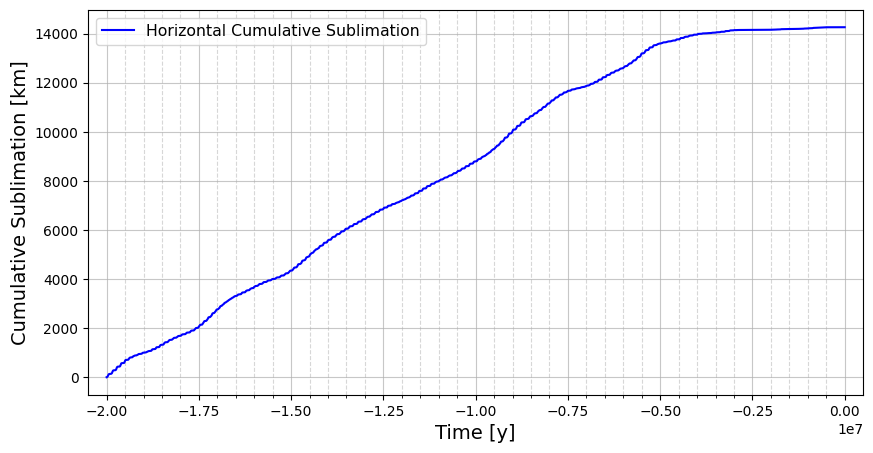

In [79]:
horiz2600=cumulative2600/np.sin(46.5)
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(years2600,horiz2600/1000,color='blue', label='Horizontal Cumulative Sublimation')


major_ticks = np.arange(-2.25e7,0.25e7, 0.25e7)
minor_ticks = np.arange(-2e7, 0, 0.05e7)
#plt.ylim(-0.1e6,9e6)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
plt.xlim(-2.05e7,0.05e7)
ax.grid(which='major', alpha=0.7)
ax.grid(which='minor', alpha=0.5, linestyle='--')
plt.ylabel('Cumulative Sublimation [km]',fontsize=14)
#plt.gca().invert_xaxis()
plt.xlabel('Time [y]',fontsize=14)
plt.legend(fontsize=11.3)
plt.grid(True)
plt.savefig('HorizontalSublimation')
#plt.xticks(np.arange(-2, 1, 0.2))

(0.0, 15000.0)

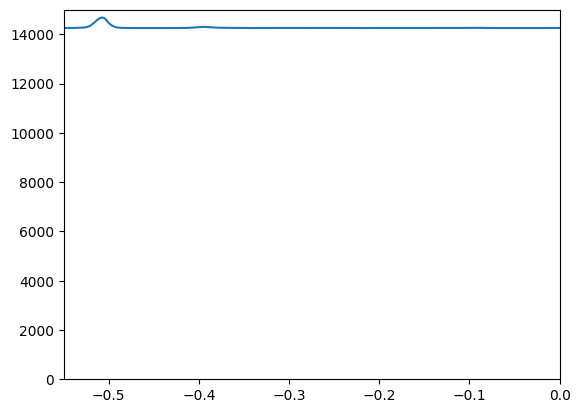

In [80]:
horiz2600
deriv2=np.gradient(horiz2600)
plt.plot(years2600/1000000,deriv2+14255)
plt.xlim(-0.55,0)
plt.ylim(0,15000)

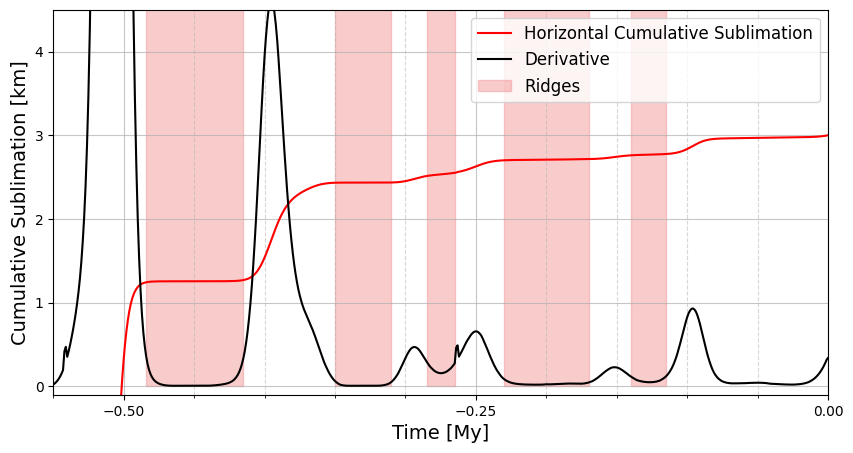

In [81]:
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(years2600/1000000,horiz2600/1000 -14258.293+3,color='red',label='Horizontal Cumulative Sublimation')
#ax.plot([-0.6,0],[14258.293,14258.293],linestyle=':',color='blue')
#ax.plot([-0.6,0],[14258.293-3,14258.293-3],linestyle=':',color='blue')
ax.plot(years2600/1000000,deriv2/10+14255.1-14258.293+3.2,color='black',label='Derivative')
ax.fill_between([-0.484,-0.415],10e6, color='lightcoral', alpha=0.4,label='Ridges')  # area under curve
ax.fill_between([-0.35,-0.31],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.285,-0.265],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.23,-0.17],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.14,-0.115],10e6, color='lightcoral', alpha=0.4)  # area under curve
#ax.fill_between([-0.14,-0.115],10e6, color='lightcoral', alpha=0.4)  # area under curve
#plt.text(-0.1, 14258.5, 'Present Day Sublimation', fontsize=14, ha='right', va='bottom', color='red')
#ax.text(-19, 24.1, 'Earth', fontsize=14, ha='right', va='bottom', color='red')

major_ticks = np.arange(-2.25,0.25, 0.25)
minor_ticks = np.arange(-2, 0, 0.05)
#plt.ylim(-0.1e6,9e6)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='major', alpha=0.7)
ax.grid(which='minor', alpha=0.5, linestyle='--')
plt.xlim(-0.55,0)
plt.ylim(-0.1,4.5)
plt.xlabel('Time [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation [km]',fontsize=14)
plt.grid(True)
plt.legend(loc='upper right',fontsize=12)
plt.savefig('RidgesHoriz')


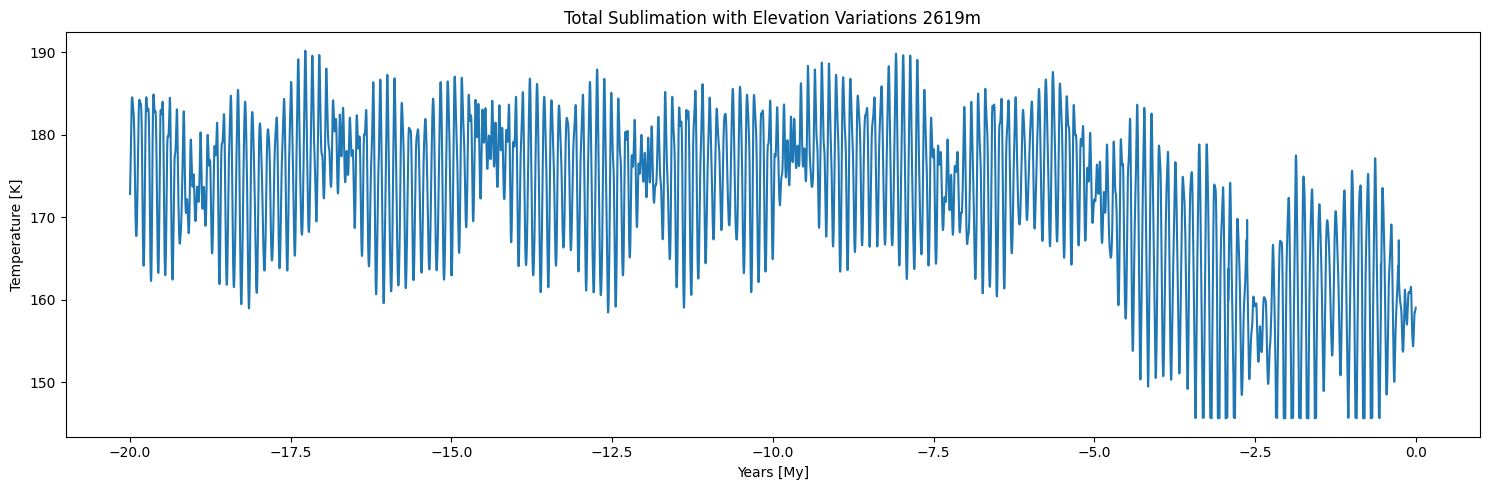

In [82]:
plt.figure(figsize=(15, 5))
plt.plot(years2600/1000000, temp2600)  


plt.xlabel('Years [My]')
plt.ylabel('Temperature [K]')
plt.title('Total Sublimation with Elevation Variations 2619m')

plt.tight_layout()
plt.show()


### Slope: Mantaining elevation 2619m and slope aspect 176.1 of South 1
46.5: Cluster (25300577 (1001-6000), 25301091 (6001-11001), 25301231 (11001-16001), 25301269 (16001-21001)) South 1 \
20: Cluster (25302669 (1001-6000), 25302722 (6001-11001), 25302770 (11001-16001), 25302804 (16001-21001)) \
60: CLuster (25302222 (1001-6000), 25302365 (6001-11001), 25302447 (11001-16001), 25302631 (16001-21001))



##### Elevation 2619m
##### Slope 20
##### Slope Aspect 176.1

In [83]:
slope20_1='SensitivityVariations/Slope20/It1.1/Output/2025-07-09/2025-07-09_1505_output.txt'
slope20_2='SensitivityVariations/Slope20/It1.2/Output/2025-07-09/2025-07-09_1506_output.txt'
slope20_3='SensitivityVariations/Slope20/It1.3/Output/2025-07-09/2025-07-09_1508_output.txt'
slope20_4='SensitivityVariations/Slope20/It1.4/Output/2025-07-09/2025-07-09_1509_output.txt'

df20_1 = pd.read_csv(slope20_1, sep=r'\s+')
df20_2 = pd.read_csv(slope20_2, sep=r'\s+')
df20_3 = pd.read_csv(slope20_3, sep=r'\s+')
df20_4 = pd.read_csv(slope20_4, sep=r'\s+')
df20_4

LaskarTimestep  time_years       ecc        obl         Lsp       Tsurf  \
0              16001    -5000000  0.092828  32.484497  159.274770  178.760892   
1              16002    -4999000  0.092276  32.615709  165.338190  178.593524   
2              16003    -4998000  0.091664  32.746939  171.328949  178.427809   
3              16004    -4997000  0.090993  32.877596  177.365988  178.259812   
4              16005    -4996000  0.090430  33.006657 -176.538338  178.095269   
...              ...         ...       ...        ...         ...         ...   
4996           20997       -4000  0.089582  24.736458 -135.201046  169.447077   
4997           20998       -3000  0.090497  24.843271 -128.653555  169.310206   
4998           20999       -2000  0.091571  24.954663 -121.964549  169.187091   
4999           21000       -1000  0.092414  25.070010 -115.454439  169.088318   
5000           21001           0  0.093315  25.189417 -108.955069  169.008118   

          SF12  ForcedConv  FreeConv  TotalSubl  
0     0.484380    0.041629  0.022345   0.063975  
1     0.491009    0.047115  0.026501   0.073616  
2     0.497664    0.053365  0.031430   0.084795  
3     0.504312    0.060536  0.037334   0.097870  
4     0.510899    0.068781  0.044411   0.113192  
...        ...         ...       ...        ...  
4996  0.178417    0.011093  0.002678   0.013771  
4997  0.181086    0.012169  0.003037   0.015206  
4998  0.183911    0.013336  0.003443   0.016779  
4999  0.186884    0.014493  0.003863   0.018356  
5000  0.190011    0.015672  0.004310   0.019982  

[5001 rows x 10 columns]

In [84]:
years20_1= (df20_1['time_years'].tolist())
years20_2= (df20_2['time_years'].tolist())[1:]
years20_3= (df20_3['time_years'].tolist())[1:]
years20_4= (df20_4['time_years'].tolist())[1:]
obl20_1=(df20_1['obl'].tolist())
obl20_2=(df20_2['obl'].tolist())[1:]
obl20_3=(df20_3['obl'].tolist())[1:]
obl20_4=(df20_4['obl'].tolist())[1:]
Subl20_1=(df20_1['TotalSubl'].tolist())
Subl20_2=(df20_2['TotalSubl'].tolist())[1:]
Subl20_3=(df20_3['TotalSubl'].tolist())[1:]
Subl20_4=(df20_4['TotalSubl'].tolist())[1:]
temp20_1=(df20_1['Tsurf'].tolist())
temp20_2=(df20_2['Tsurf'].tolist())[1:]
temp20_3=(df20_3['Tsurf'].tolist())[1:]
temp20_4=(df20_4['Tsurf'].tolist())[1:]

In [85]:
years20=np.array(years20_1+years20_2+years20_3+years20_4)
obl20=np.array(obl20_1+obl20_2+obl20_3+obl20_4)
Subl20=np.array(Subl20_1+Subl20_2+Subl20_3+Subl20_4)
temp20=np.array(temp20_1+temp20_2+temp20_3+temp20_4)

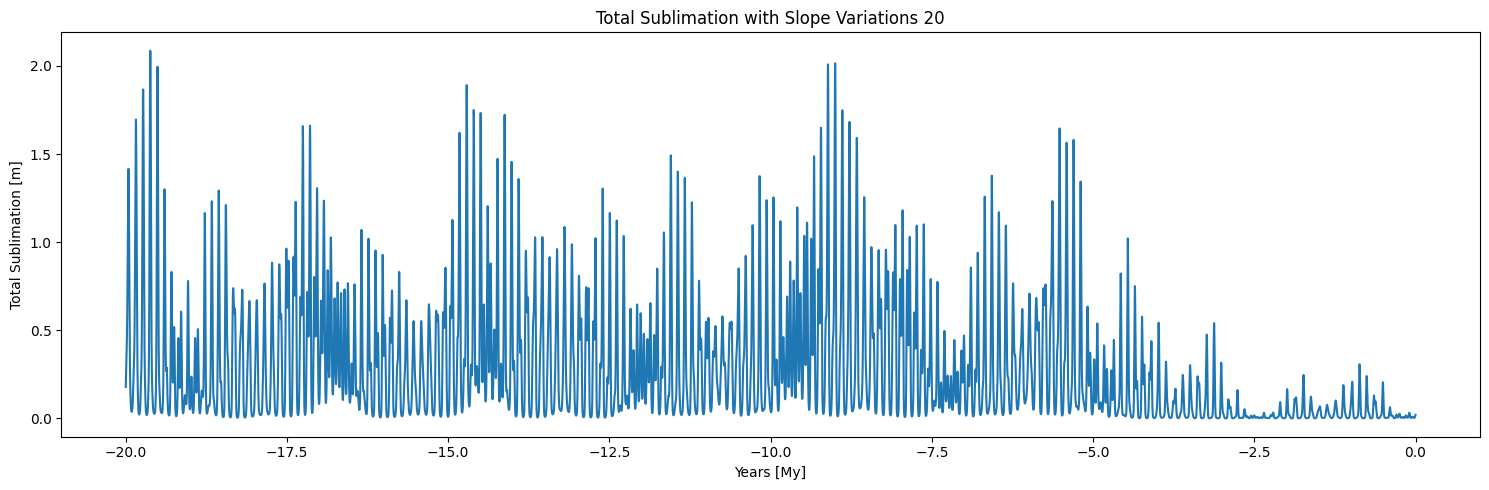

In [86]:
plt.figure(figsize=(15, 5))
plt.plot(years20/1000000, Subl20)  #should I multiply by 1000 


plt.xlabel('Years [My]')
plt.ylabel('Total Sublimation [m]')
plt.title('Total Sublimation with Slope Variations 20')


plt.tight_layout()
plt.show()

In [87]:
cumulative20=[]
val=0
for i in Subl20:
    val+= i*1000
    cumulative20.append(val)


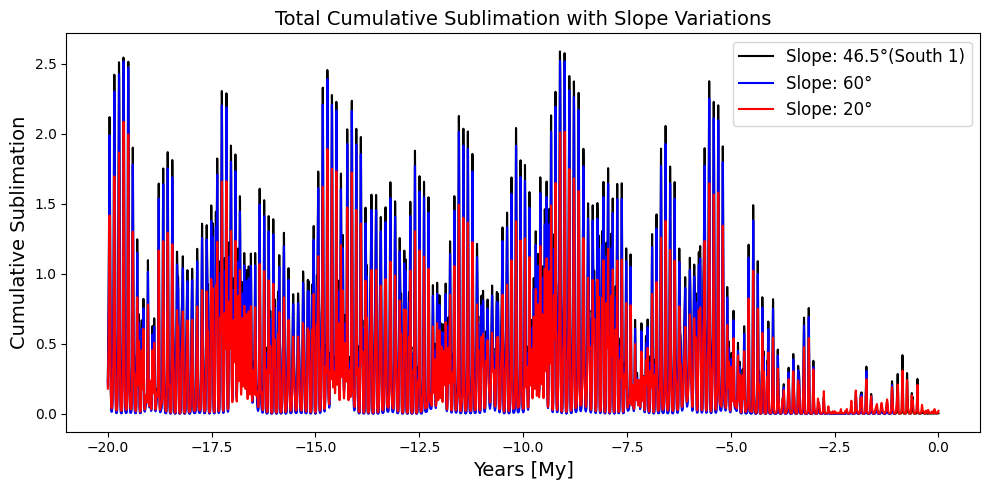

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(years2600/1000000,Subl2600,color='black', label='Slope: 46.5°(South 1)')

plt.plot(years60/1000000,Subl60,color='blue',label='Slope: 60°')
plt.plot(years20/1000000, Subl20,color='red', label='Slope: 20°')  

plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation',fontsize=14)
plt.title('Total Cumulative Sublimation with Slope Variations',fontsize=14)

plt.legend(fontsize=12)

plt.savefig('SensitivitySlope')
plt.tight_layout()
plt.show()

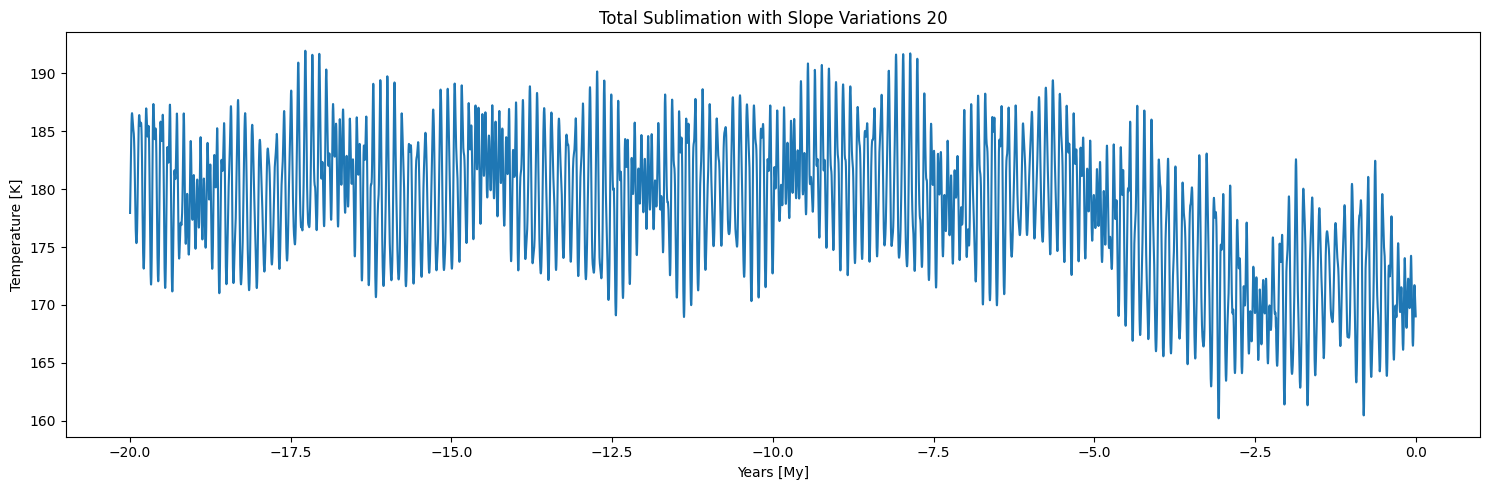

In [89]:
plt.figure(figsize=(15, 5))
plt.plot(years20/1000000, temp20)  


plt.xlabel('Years [My]')
plt.ylabel('Temperature [K]')
plt.title('Total Sublimation with Slope Variations 2619m')

plt.tight_layout()
plt.show()

##### Elevation 2619m
##### Slope 60
##### Slope Aspect 176.1

In [90]:
slope60_1='SensitivityVariations/Slope60/It1.1/Output/2025-07-09/2025-07-09_1450_output.txt'
slope60_2='SensitivityVariations/Slope60/It1.2/Output/2025-07-09/2025-07-09_1457_output.txt'
slope60_3='SensitivityVariations/Slope60/It1.3/Output/2025-07-09/2025-07-09_1500_output.txt'
slope60_4='SensitivityVariations/Slope60/It1.4/Output/2025-07-09/2025-07-09_1502_output.txt'

df60_1 = pd.read_csv(slope60_1, sep=r'\s+')
df60_2 = pd.read_csv(slope60_2, sep=r'\s+')
df60_3 = pd.read_csv(slope60_3, sep=r'\s+')
df60_4 = pd.read_csv(slope60_4, sep=r'\s+')
df60_4

LaskarTimestep  time_years       ecc        obl         Lsp       Tsurf  \
0              16001    -5000000  0.092828  32.484497  159.274770  173.161875   
1              16002    -4999000  0.092276  32.615709  165.338190  173.152214   
2              16003    -4998000  0.091664  32.746939  171.328949  173.152836   
3              16004    -4997000  0.090993  32.877596  177.365988  173.145520   
4              16005    -4996000  0.090430  33.006657 -176.538338  173.165306   
...              ...         ...       ...        ...         ...         ...   
3941           19942    -1059000  0.057241  19.903046   56.760769  155.484908   
3942           19943    -1058000  0.058899  19.716583   62.578446  155.387173   
3943           19944    -1057000  0.060698  19.545061   68.318724  155.317815   
3944           19945    -1056000  0.062282  19.390593   74.158011  155.257400   
3945           19946    -1055000  0.063869  19.252742   79.771642  155.191505   

          SF12  ForcedConv  FreeConv  TotalSubl  
0     0.484380    0.027933  0.013829   0.041761  
1     0.491009    0.033072  0.017662   0.050734  
2     0.497664    0.039346  0.022616   0.061962  
3     0.504312    0.047079  0.029072   0.076151  
4     0.510899    0.056809  0.037666   0.094474  
...        ...         ...       ...        ...  
3941  0.091129    0.000000  0.000000   0.000000  
3942  0.088798    0.000000  0.000000   0.000000  
3943  0.086706    0.000000  0.000000   0.000000  
3944  0.084864    0.000000  0.000000   0.000000  
3945  0.083253    0.000000  0.000000   0.000000  

[3946 rows x 10 columns]

In [91]:
years60_1= (df60_1['time_years'].tolist())
years60_2= (df60_2['time_years'].tolist())[1:]
years60_3= (df60_3['time_years'].tolist())[1:]
years60_4= (df60_4['time_years'].tolist())[1:]
obl60_1=(df60_1['obl'].tolist())
obl60_2=(df60_2['obl'].tolist())[1:]
obl60_3=(df60_3['obl'].tolist())[1:]
obl60_4=(df60_4['obl'].tolist())[1:]
Subl60_1=(df60_1['TotalSubl'].tolist())
Subl60_2=(df60_2['TotalSubl'].tolist())[1:]
Subl60_3=(df60_3['TotalSubl'].tolist())[1:]
Subl60_4=(df60_4['TotalSubl'].tolist())[1:]
temp60_1=(df60_1['Tsurf'].tolist())
temp60_2=(df60_2['Tsurf'].tolist())[1:]
temp60_3=(df60_3['Tsurf'].tolist())[1:]
temp60_4=(df60_4['Tsurf'].tolist())[1:]

In [92]:
years60=np.array(years60_1+years60_2+years60_3+years60_4)
obl60=np.array(obl60_1+obl60_2+obl60_3+obl60_4)
Subl60=np.array(Subl60_1+Subl60_2+Subl60_3+Subl60_4)
temp60=np.array(temp60_1+temp60_2+temp60_3+temp60_4)

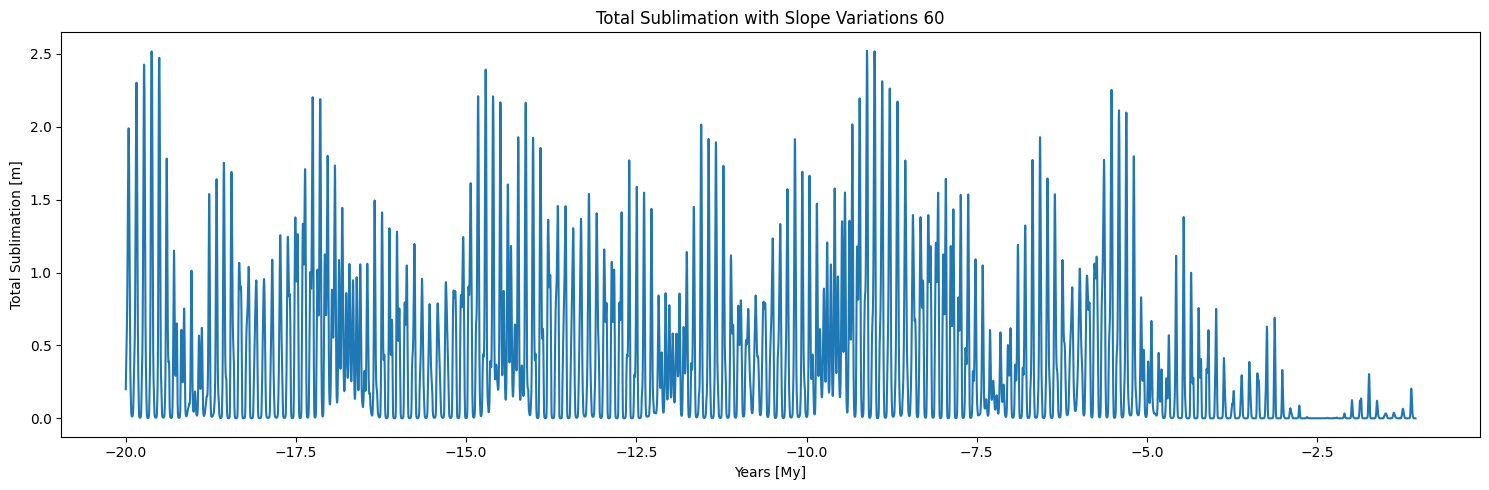

In [93]:
plt.figure(figsize=(15, 5))
plt.plot(years60/1000000, Subl60)  #should I multiply by 1000 


plt.xlabel('Years [My]')
plt.ylabel('Total Sublimation [m]')
plt.title('Total Sublimation with Slope Variations 60')


plt.tight_layout()
plt.show()

In [94]:
cumulative60=[]
val=0
for i in Subl60:
    val+= i*1000
    cumulative60.append(val)


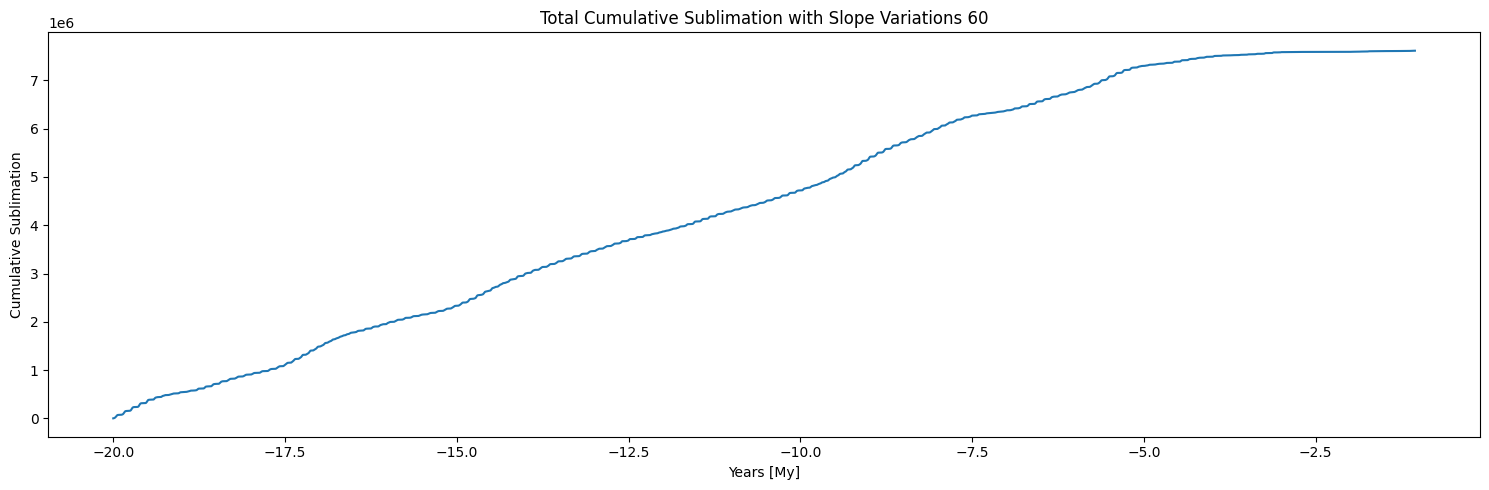

In [95]:
plt.figure(figsize=(15, 5))
plt.plot(years60/1000000, cumulative60)  


plt.xlabel('Years [My]')
plt.ylabel('Cumulative Sublimation')
plt.title('Total Cumulative Sublimation with Slope Variations 60')


plt.tight_layout()
plt.show()

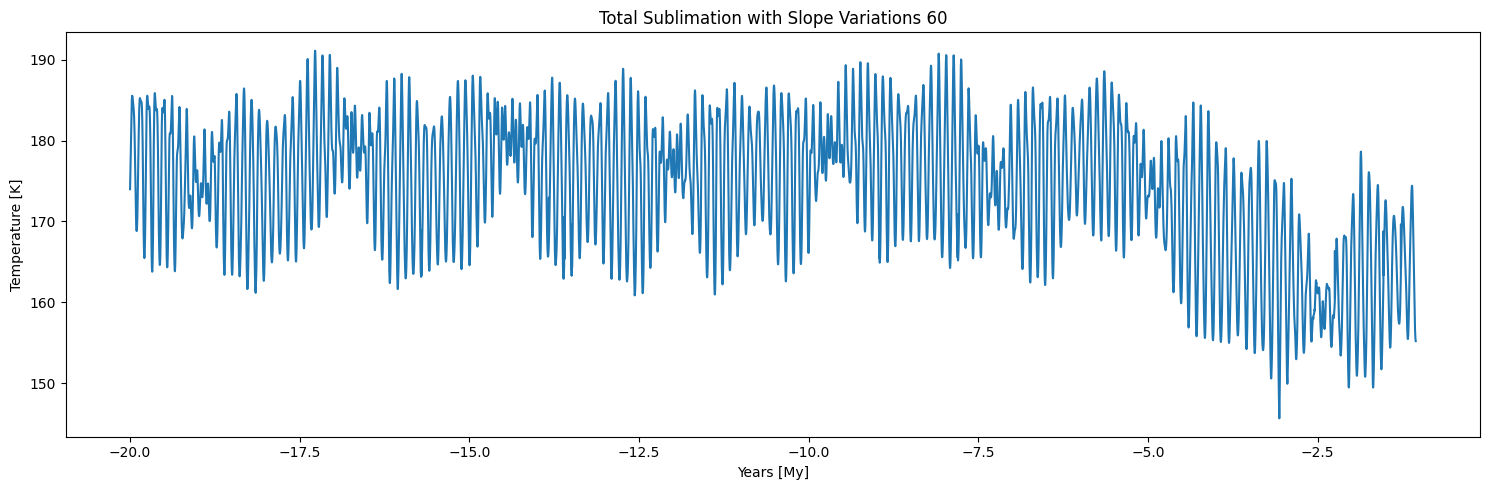

In [96]:
plt.figure(figsize=(15, 5))
plt.plot(years60/1000000, temp60)  


plt.xlabel('Years [My]')
plt.ylabel('Temperature [K]')
plt.title('Total Sublimation with Slope Variations 60')

plt.tight_layout()
plt.show()

### Slope Aspect: Mantaining elevation 2619m and slope 46.5 of South 1
176.1: Cluster (25300577 (1001-6000), 25301091 (6001-11001), 25301231 (11001-16001), 25301269 (16001-21001)) South 1\
146.1: Cluster (25301872 (1001-6000), 25301891 (6001-11001), 25302064 (11001-16001), 25302141 (16001-21001)) \
206.1: Cluster (25301499 (1001-6000), 25301610 (6001-11001), 25301684 (11001-16001), 25301704 (16001-21001))



##### Elevation 2619m
##### Slope 46.5
##### Slope Aspect 146.1

In [97]:
slope140_1='SensitivityVariations/Aspect140/It1.1/Output/2025-07-09/2025-07-09_1437_output.txt'
slope140_2='SensitivityVariations/Aspect140/It1.2/Output/2025-07-09/2025-07-09_1457_output.txt'
slope140_3='SensitivityVariations/Aspect140/It1.3/Output/2025-07-09/2025-07-09_1443_output.txt'
slope140_4='SensitivityVariations/Aspect140/It1.4/Output/2025-07-09/2025-07-09_1447_output.txt'

df140_1 = pd.read_csv(slope140_1, sep=r'\s+')
df140_2 = pd.read_csv(slope140_2, sep=r'\s+')
df140_3 = pd.read_csv(slope140_3, sep=r'\s+')
df140_4 = pd.read_csv(slope140_4, sep=r'\s+')
df140_4

LaskarTimestep  time_years       ecc        obl         Lsp       Tsurf  \
0              16001    -5000000  0.092828  32.484497  159.274770  177.502190   
1              16002    -4999000  0.092276  32.615709  165.338190  177.388848   
2              16003    -4998000  0.091664  32.746939  171.328949  177.284023   
3              16004    -4997000  0.090993  32.877596  177.365988  177.169515   
4              16005    -4996000  0.090430  33.006657 -176.538338  177.078242   
...              ...         ...       ...        ...         ...         ...   
4996           20997       -4000  0.089582  24.736458 -135.201046  167.748544   
4997           20998       -3000  0.090497  24.843271 -128.653555  167.633675   
4998           20999       -2000  0.091571  24.954663 -121.964549  167.530475   
4999           21000       -1000  0.092414  25.070010 -115.454439  167.456949   
5000           21001           0  0.093315  25.189417 -108.955069  167.395821   

          SF12  ForcedConv  FreeConv  TotalSubl  
0     0.484380    0.031124  0.015036   0.046160  
1     0.491009    0.036005  0.018596   0.054602  
2     0.497664    0.041791  0.023029   0.064820  
3     0.504312    0.048640  0.028559   0.077199  
4     0.510899    0.056928  0.035600   0.092528  
...        ...         ...       ...        ...  
4996  0.178417    0.004109  0.000276   0.004386  
4997  0.181086    0.004527  0.000336   0.004863  
4998  0.183911    0.004989  0.000406   0.005396  
4999  0.186884    0.005463  0.000486   0.005950  
5000  0.190011    0.005952  0.000576   0.006528  

[5001 rows x 10 columns]

In [98]:
years140_1= (df140_1['time_years'].tolist())
years140_2= (df140_2['time_years'].tolist())[1:]
years140_3= (df140_3['time_years'].tolist())[1:]
years140_4= (df140_4['time_years'].tolist())[1:]
obl140_1=(df140_1['obl'].tolist())
obl140_2=(df140_2['obl'].tolist())[1:]
obl140_3=(df140_3['obl'].tolist())[1:]
obl140_4=(df140_4['obl'].tolist())[1:]
Subl140_1=(df140_1['TotalSubl'].tolist())
Subl140_2=(df140_2['TotalSubl'].tolist())[1:]
Subl140_3=(df140_3['TotalSubl'].tolist())[1:]
Subl140_4=(df140_4['TotalSubl'].tolist())[1:]
temp140_1=(df140_1['Tsurf'].tolist())
temp140_2=(df140_2['Tsurf'].tolist())[1:]
temp140_3=(df140_3['Tsurf'].tolist())[1:]
temp140_4=(df140_4['Tsurf'].tolist())[1:]

In [99]:
years140=np.array(years140_1+years140_2+years140_3+years140_4)
obl140=np.array(obl140_1+obl140_2+obl140_3+obl140_4)
Subl140=np.array(Subl140_1+Subl140_2+Subl140_3+Subl140_4)
temp140=np.array(temp140_1+temp140_2+temp140_3+temp140_4)

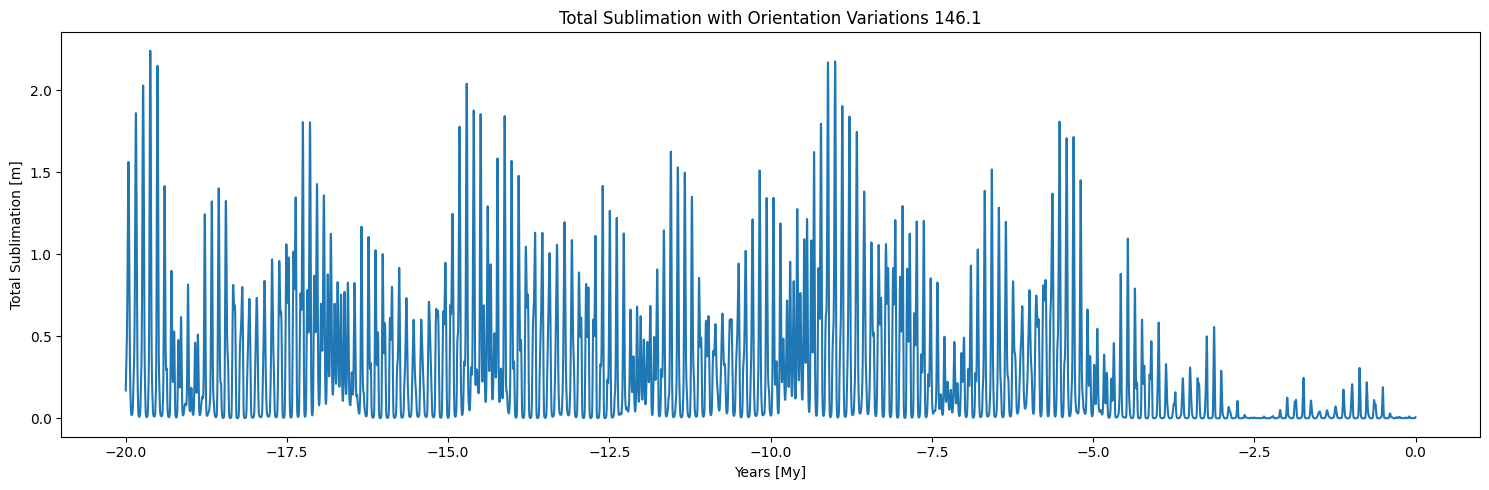

In [100]:
plt.figure(figsize=(15, 5))
plt.plot(years140/1000000, Subl140)  #should I multiply by 1000 


plt.xlabel('Years [My]')
plt.ylabel('Total Sublimation [m]')
plt.title('Total Sublimation with Orientation Variations 146.1')


plt.tight_layout()
plt.show()

In [108]:
cumulative140=[]
val=0
for i in Subl140:
    val+= i*1000
    cumulative140.append(val)


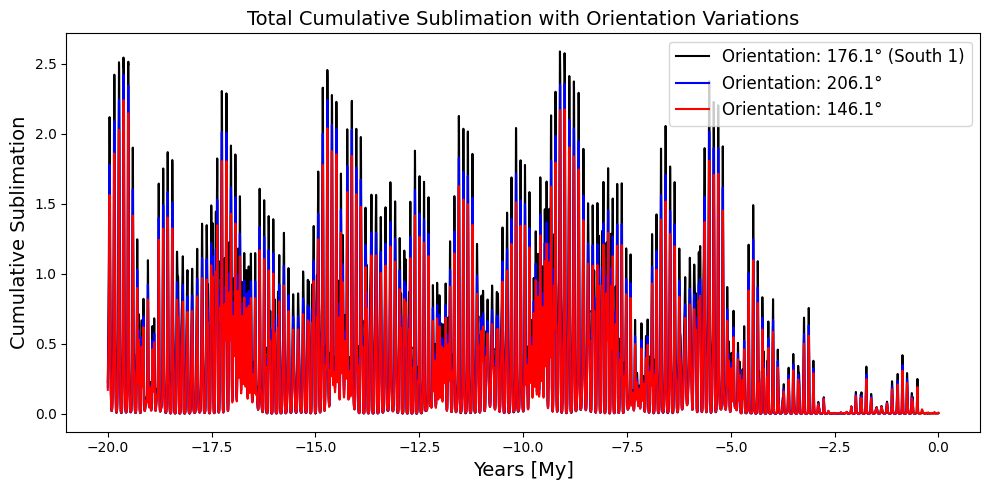

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(years2600/1000000,Subl2600,label='Orientation: 176.1° (South 1)',color='black')

plt.plot(years206/1000000,Subl206,label='Orientation: 206.1° ',color='blue')
plt.plot(years140/1000000, Subl140,label='Orientation: 146.1°',color='red')  


plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation',fontsize=14)
plt.title('Total Cumulative Sublimation with Orientation Variations',fontsize=14)

plt.legend(fontsize=12)

plt.savefig('SensitivityOrientation')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(years140/1000000, temp140)  


plt.xlabel('Years [My]')
plt.ylabel('Temperature [K]')
plt.title('Total Sublimation with Orientation Variations 140')

plt.tight_layout()
plt.show()

##### Elevation 2619m
##### Slope 46.5
##### Slope Aspect 206.1

In [104]:
slope206_1='SensitivityVariations/Aspect200/It1.1/Output/2025-07-09/2025-07-09_1427_output.txt'
slope206_2='SensitivityVariations/Aspect200/It1.2/Output/2025-07-09/2025-07-09_1439_output.txt'
slope206_3='SensitivityVariations/Aspect200/It1.3/Output/2025-07-09/2025-07-09_1439_output.txt'
slope206_4='SensitivityVariations/Aspect200/It1.4/Output/2025-07-09/2025-07-09_1438_output.txt'

df206_1 = pd.read_csv(slope206_1, sep=r'\s+')
df206_2 = pd.read_csv(slope206_2, sep=r'\s+')
df206_3 = pd.read_csv(slope206_3, sep=r'\s+')
df206_4 = pd.read_csv(slope206_4, sep=r'\s+')
df206_4

LaskarTimestep  time_years       ecc        obl         Lsp       Tsurf  \
0              16001    -5000000  0.092828  32.484497  159.274770  175.340073   
1              16002    -4999000  0.092276  32.615709  165.338190  175.265932   
2              16003    -4998000  0.091664  32.746939  171.328949  175.194034   
3              16004    -4997000  0.090993  32.877596  177.365988  175.130946   
4              16005    -4996000  0.090430  33.006657 -176.538338  175.062886   
...              ...         ...       ...        ...         ...         ...   
4423           20424     -577000  0.079576  19.260880  133.857829  160.944446   
4424           20425     -576000  0.081243  19.057816  140.241434  160.693916   
4425           20426     -575000  0.082835  18.873431  146.367989  160.446875   
4426           20427     -574000  0.084409  18.707435  152.470876  160.212875   
4427           20428     -573000  0.086083  18.561957  158.581051  159.952958   

          SF12  ForcedConv  FreeConv  TotalSubl  
0     0.484380    0.032542  0.016683   0.049224  
1     0.491009    0.037839  0.020661   0.058500  
2     0.497664    0.044092  0.025604   0.069696  
3     0.504312    0.051655  0.031878   0.083533  
4     0.510899    0.060769  0.039864   0.100632  
...        ...         ...       ...        ...  
4423  0.083347    0.000037  0.000000   0.000037  
4424  0.081028    0.000035  0.000000   0.000035  
4425  0.078977    0.000035  0.000000   0.000035  
4426  0.077176    0.000036  0.000000   0.000036  
4427  0.075631    0.000037  0.000000   0.000037  

[4428 rows x 10 columns]

In [105]:
years206_1= (df206_1['time_years'].tolist())
years206_2= (df206_2['time_years'].tolist())[1:]
years206_3= (df206_3['time_years'].tolist())[1:]
years206_4= (df206_4['time_years'].tolist())[1:]
obl206_1=(df206_1['obl'].tolist())
obl206_2=(df206_2['obl'].tolist())[1:]
obl206_3=(df206_3['obl'].tolist())[1:]
obl206_4=(df206_4['obl'].tolist())[1:]
Subl206_1=(df206_1['TotalSubl'].tolist())
Subl206_2=(df206_2['TotalSubl'].tolist())[1:]
Subl206_3=(df206_3['TotalSubl'].tolist())[1:]
Subl206_4=(df206_4['TotalSubl'].tolist())[1:]
temp206_1=(df206_1['Tsurf'].tolist())
temp206_2=(df206_2['Tsurf'].tolist())[1:]
temp206_3=(df206_3['Tsurf'].tolist())[1:]
temp206_4=(df206_4['Tsurf'].tolist())[1:]

In [106]:
years206=np.array(years206_1+years206_2+years206_3+years206_4)
obl206=np.array(obl206_1+obl206_2+obl206_3+obl206_4)
Subl206=np.array(Subl206_1+Subl206_2+Subl206_3+Subl206_4)
temp206=np.array(temp206_1+temp206_2+temp206_3+temp206_4)

In [107]:
cumulative206=[]
val=0
for i in Subl206:
    val+= i*1000
    cumulative206.append(val)


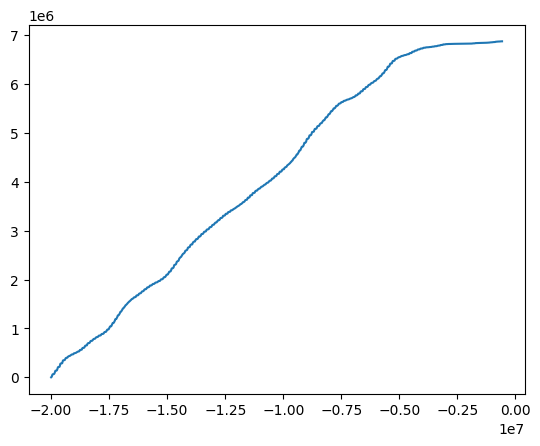

In [110]:
plt.plot(years206,cumulative206)